In [102]:
import pandas as pd
import thinkstats2
import numpy as np
import thinkplot
from scipy import stats
import random
%matplotlib inline

In [52]:
donations = pd.read_csv("Managers.csv")
donations["rankinlg"]= donations["rank"]

In [53]:
donations.describe()

,yearID,inseason,G,W,L,rank,rankinlg
count,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000
mean,1954.223516,1.233120,124.168510,61.729627,61.738068,4.338766,4.338766
std,42.078606,0.596025,50.414981,28.746768,26.417168,2.396849,2.396849
min,1871.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1918.000000,1.000000,91.000000,42.000000,46.000000,2.000000,2.000000
50%,1962.000000,1.000000,154.000000,70.000000,68.000000,4.000000,4.000000
75%,1991.000000,1.000000,162.000000,84.000000,81.000000,6.000000,6.000000
max,2016.000000,9.000000,165.000000,116.000000,120.000000,12.000000,12.000000


In [54]:
hist = thinkstats2.Hist(donations.G, label="G")
hist

Hist({1: 37, 2: 20, 3: 9, 4: 11, 5: 8, 6: 11, 7: 7, 8: 11, 9: 7, 10: 11, 11: 13, 12: 7, 13: 10, 14: 10, 15: 4, 16: 12, 17: 15, 18: 7, 19: 7, 20: 7, 21: 1, 22: 8, 23: 11, 24: 7, 25: 15, 26: 5, 27: 9, 28: 10, 29: 10, 30: 8, 31: 9, 32: 7, 33: 7, 34: 7, 35: 11, 36: 8, 37: 12, 38: 10, 39: 11, 40: 16, 41: 10, 42: 9, 43: 7, 44: 7, 45: 3, 46: 13, 47: 9, 48: 3, 49: 5, 50: 13, 51: 13, 52: 4, 53: 11, 54: 8, 55: 6, 56: 9, 57: 10, 58: 11, 59: 3, 60: 14, 61: 11, 62: 9, 63: 14, 64: 5, 65: 10, 66: 7, 67: 6, 68: 5, 69: 9, 70: 13, 71: 6, 72: 4, 73: 10, 74: 12, 75: 12, 76: 9, 77: 6, 78: 9, 79: 15, 80: 14, 81: 9, 82: 11, 83: 11, 84: 14, 85: 11, 86: 13, 87: 6, 88: 6, 89: 2, 90: 9, 91: 8, 92: 6, 93: 6, 94: 4, 95: 8, 96: 12, 97: 3, 98: 12, 99: 7, 100: 10, 101: 3, 102: 5, 103: 6, 104: 8, 105: 10, 106: 9, 107: 5, 108: 6, 109: 10, 110: 12, 111: 11, 112: 14, 113: 17, 114: 14, 115: 18, 116: 6, 117: 5, 118: 6, 119: 2, 120: 9, 121: 8, 122: 3, 123: 3, 124: 12, 125: 11, 126: 12, 127: 7, 128: 5, 129: 6, 130: 10, 131: 

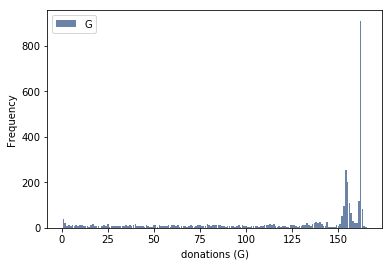

In [55]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='donations (G)', ylabel='Frequency')

In [56]:
hist = thinkstats2.Hist(donations.rankinlg, label="rankinlg")
hist

Hist({1: 442, 2: 479, 3: 480, 4: 488, 5: 501, 6: 377, 7: 290, 8: 248, 9: 42, 10: 43, 11: 25, 12: 21})

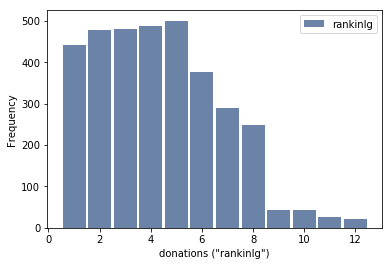

In [57]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='donations ("rankinlg")', ylabel='Frequency')

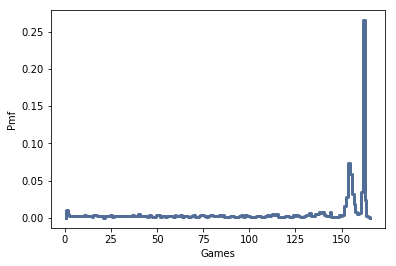

In [66]:
pmfg = thinkstats2.Pmf(donations.G)
thinkplot.Pmf(pmfg)
thinkplot.Config(xlabel='Games', ylabel='Pmf')

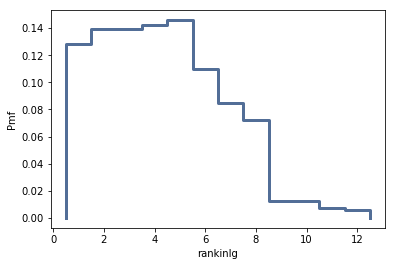

In [67]:
pmfr = thinkstats2.Pmf(donations.rankinlg)
thinkplot.Pmf(pmfr)
thinkplot.Config(xlabel='rankinlg', ylabel='Pmf')

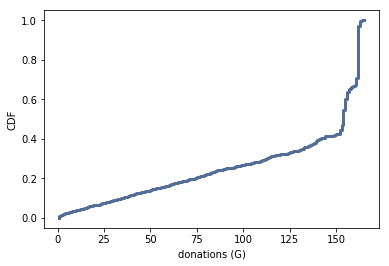

In [72]:
cdf = thinkstats2.Cdf(donations.G)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='donations (G)', ylabel='CDF', loc='upper left')

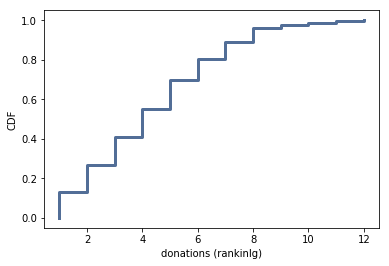

In [73]:
cdf = thinkstats2.Cdf(donations.rankinlg)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='donations (rankinlg)', ylabel='CDF', loc='upper left')

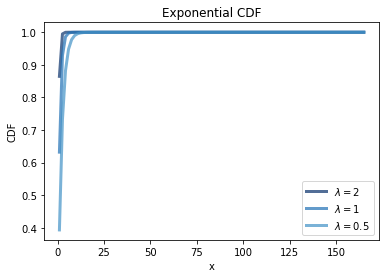

In [78]:
thinkplot.PrePlot()
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam,donations.G.min(), donations.G.max())
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='Exponential CDF', xlabel='x', ylabel='CDF', 
                 loc='lower right')

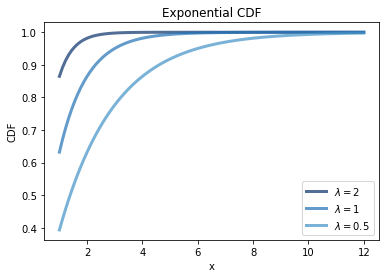

In [79]:
thinkplot.PrePlot()
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam,donations.rankinlg.min(), donations.rankinlg.max())
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='Exponential CDF', xlabel='x', ylabel='CDF', 
                 loc='lower right')

In [103]:
def Cov(xs, ys, meanx=None, meany=None):
    G = np.asarray(xs)
    rankinlg = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(G)
    if meany is None:
        meany = np.mean(rankinlg)

    cov = np.dot(G-meanx, rankinlg-meany) / len(G)
    return cov

In [109]:

Cov(donations.G, donations.rankinlg)

-37.320182048324881

In [111]:

np.corrcoef(donations.G,donations.rankinlg)

array([[ 1.      , -0.308937],
       [-0.308937,  1.      ]])

In [128]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=100):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [129]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.std() - group2.std())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [130]:
data = donations.G.values, donations.rankinlg.values

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0